**GenAI - Generative Adversarial Networks (GANs)**

**Discriminative**

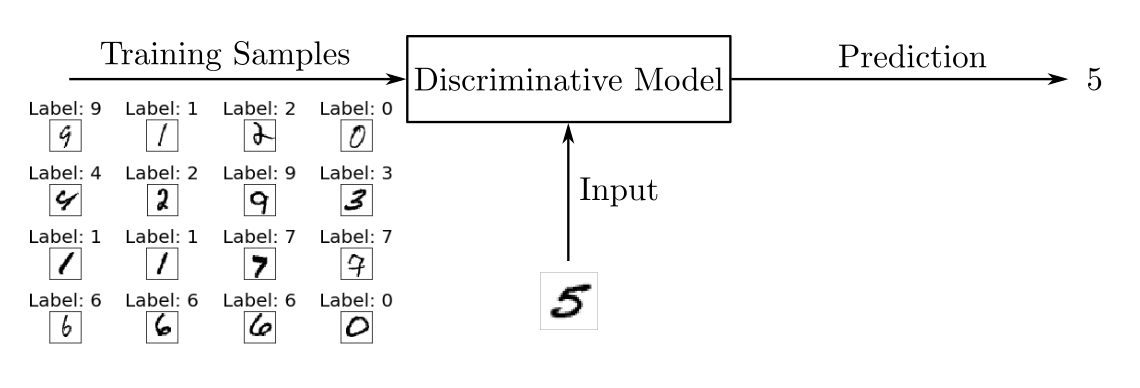

**Generative**

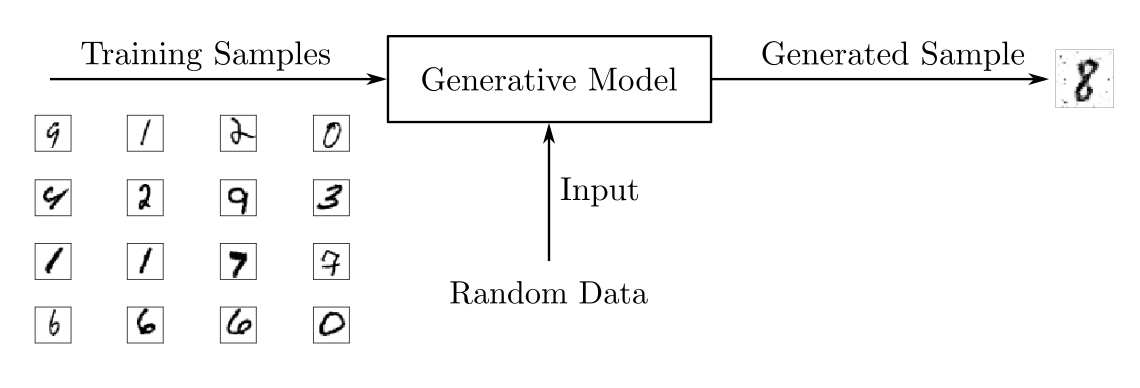

In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(111)

**Preparing the Training Data**

Training data is - X1, X2

x1 - 0 to 2π

x2 - sin(x1)

In [3]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
# X1  - 0 to 2π
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)

#X2 - x2 - sin(x1)
train_data[:, 1] =torch.sin(train_data[:, 0])

train_labels = torch.zeros(train_data_length)

train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

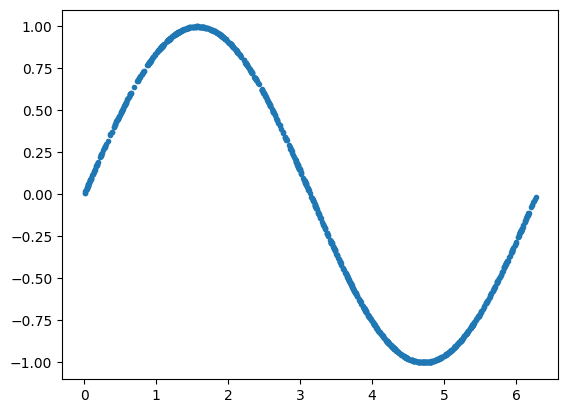

In [4]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [5]:
# PyTorch data loader

batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

**Implementing the Discriminator**

In [7]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )
  def forward(self, x):
    output = self.model(x)
    return output

In [8]:
discriminator = Discriminator()

You use .__init__() to build the model. First, you need to call super().__init__() to run .__init__() from nn.Module. The discriminator you’re using is an MLP neural network defined in a sequential way using nn.Sequential(). It has the following characteristics:

Lines 5 and 6: The input is two-dimensional, and the first hidden layer is composed of 256 neurons with ReLU activation.

Lines 8, 9, 11, and 12: The second and third hidden layers are composed of 128 and 64 neurons, respectively, with ReLU activation.

Lines 14 and 15: The output is composed of a single neuron with sigmoidal activation to represent a probability.

Lines 7, 10, and 13: After the first, second, and third hidden layers, you use dropout to avoid overfitting.

**Implementing the Generator**

In [9]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

Here, generator represents the generator neural network. It’s composed of two hidden layers with 16 and 32 neurons, both with ReLU activation, and a linear activation layer with 2 neurons in the output

**Training the Models**

In [10]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

Line 1 sets the learning rate (lr), which you’ll use to adapt the network weights.

Line 2 sets the number of epochs (num_epochs), which defines how many repetitions of training using the whole training set will be performed.

Line 3 assigns the variable loss_function to the binary cross-entropy function BCELoss(), which is the loss function that you’ll use to train the models.

In [11]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

PyTorch implements various weight update rules for model training in torch.optim. You’ll use the Adam algorithm to train the discriminator and generator models.

In [17]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.2468668669462204
Epoch: 0 Loss G.: 1.9599859714508057
Epoch: 10 Loss D.: 0.6722104549407959
Epoch: 10 Loss G.: 0.9413248300552368
Epoch: 20 Loss D.: 0.6490586996078491
Epoch: 20 Loss G.: 0.7718613147735596
Epoch: 30 Loss D.: 0.6745001077651978
Epoch: 30 Loss G.: 0.6989280581474304
Epoch: 40 Loss D.: 0.667940616607666
Epoch: 40 Loss G.: 0.8268781900405884
Epoch: 50 Loss D.: 0.5998124480247498
Epoch: 50 Loss G.: 0.745004415512085
Epoch: 60 Loss D.: 0.6813066005706787
Epoch: 60 Loss G.: 0.6835837364196777
Epoch: 70 Loss D.: 0.7072675228118896
Epoch: 70 Loss G.: 0.736534595489502
Epoch: 80 Loss D.: 0.7029774785041809
Epoch: 80 Loss G.: 0.7819569110870361
Epoch: 90 Loss D.: 0.6651455760002136
Epoch: 90 Loss G.: 0.7597579956054688
Epoch: 100 Loss D.: 0.6586918234825134
Epoch: 100 Loss G.: 0.7686402797698975
Epoch: 110 Loss D.: 0.6880273818969727
Epoch: 110 Loss G.: 0.8156330585479736
Epoch: 120 Loss D.: 0.7018561363220215
Epoch: 120 Loss G.: 0.7298683524131775
Epoch: 130 

Line 2: You get the real samples of the current batch from the data loader and assign them to real_samples. Notice that the first dimension of the tensor has the number of elements equal to batch_size. This is the standard way of organizing data in PyTorch, with each line of the tensor representing one sample from the batch.

Line 4: You use torch.ones() to create labels with the value 1 for the real samples, and then you assign the labels to real_samples_labels.

Lines 5 and 6: You create the generated samples by storing random data in latent_space_samples, which you then feed to the generator to obtain generated_samples.

Line 7: You use torch.zeros() to assign the value 0 to the labels for the generated samples, and then you store the labels in generated_samples_labels.

Lines 8 to 11: You concatenate the real and generated samples and labels and store them in all_samples and all_samples_labels, which you’ll use to train the discriminator.


Next, in lines 14 to 19, you train the discriminator:

Line 14: In PyTorch, it’s necessary to clear the gradients at each training step to avoid accumulating them. You do this using .zero_grad().

Line 15: You calculate the output of the discriminator using the training data in all_samples.

Lines 16 and 17: You calculate the loss function using the output from the model in output_discriminator and the labels in all_samples_labels.

Line 18: You calculate the gradients to update the weights with loss_discriminator.backward().

Line 19: You update the discriminator weights by calling optimizer_discriminator.step().


Next, in line 22, you prepare the data to train the generator. You store random data in latent_space_samples, with a number of lines equal to batch_size. You use two columns since you’re providing two-dimensional data as input to the generator.

You train the generator in lines 25 to 32:

Line 25: You clear the gradients with .zero_grad().

Line 26: You feed the generator with latent_space_samples and store its output in generated_samples.

Line 27: You feed the generator’s output into the discriminator and store its output in output_discriminator_generated, which you’ll use as the output of the whole model.

Lines 28 to 30: You calculate the loss function using the output of the classification system stored in output_discriminator_generated and the labels in real_samples_labels, which are all equal to 1.

Lines 31 and 32: You calculate the gradients and update the generator weights. Remember that when you trained the generator, you kept the discriminator weights frozen since you created optimizer_generator with its first argument equal to generator.parameters().

**Checking the Samples Generated by the GAN**

In [18]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

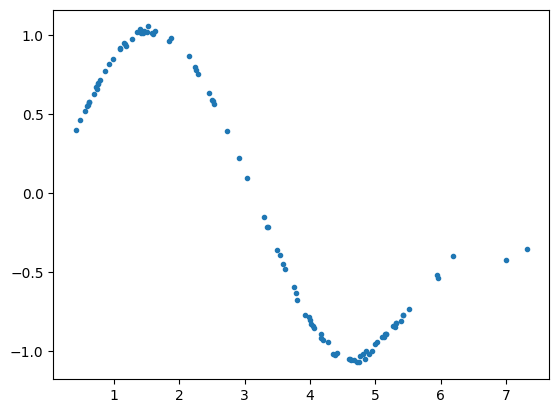

In [19]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")